In [4]:
library("tidyverse")
library("dplyr")
library("zoo")
library("pomp")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘pomp’


The following object is masked from ‘package:zoo’:

    time<-


The following object is masked from ‘package:purrr’:

    map




In [5]:
setwd("~/Desktop/School/research/pf_mobility")

In [5]:
source("scripts/read_data.R")
source("constants/file_loc.R")

source("functions/d_measure.R")
source("functions/r_process.R")
source("functions/priors.R")
source("functions/disc_gamma.R")
source("functions/run_pfilter.R")
source("functions/simulate_data.R")
source("functions/get_renewal.R")
source("functions/get_true_rt.R")


Attaching package: ‘extraDistr’


The following object is masked from ‘package:purrr’:

    rdunif




In [6]:
### Import data functions ###
get_who <- function(country, smooth=FALSE, k = 7){
    alldata = read.csv('data/WHO-COVID-19-global-data.csv')
    idcountry = which(alldata$Country == country)
    Iday = alldata$New_cases[idcountry]
    if(smooth){
        Iday <- rollmean(Iday, k=k, fill=NA)
        Iday <- na.omit(Iday)
    }
    covid <- data.frame(y = round(Iday), idx = 1:length(Iday))
    return(covid)
}

In [7]:
### Plot true Rt
get_rt <- function(y, shape, scale){
    est_lday <- rep(0, length(y))
    for(k in 2:length(y)){
        est_lday[k] <- sum(y[(k-1):1]*disc_gamma(1:(k-1), shape = shape, scale = scale))
    }
    est_lday[1] <- est_lday[2]
    return((y)/est_lday)
}

# New Zealand

1. Example from Epifilter
2. Used lognormal+poisson model, no modification of cases
3. Manually selected sdlog=0.3, x_init=1. x_init changes sdlog b/c variance of log normal depends on x as well.
4. Perfect fit

In [8]:
nz <- get_who("New Zealand", smooth=FALSE)

In [9]:
nz$y

[1]  5  0  0  0  1  0  0  2  1  0  0  0  0  0  0  1  0  0  5  9 15 14 13  0 36
 [26] 40 47 73 76 78 60 76 48 47 76 51 50 48 39 32 26 23 23 20 14 15  8  6  6  2
 [51]  8  4  7  2  5  0  2  3  4  1  2  2  3  3  2  2  1  0  1  1  2  1  2  3  0
 [76]  0  0  1  0  1  0  4  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[101]  0  0  0  0  0  0  0  0  0  2  0  1  0  2  0  4  2  1  3  1  2  4  2  0  0
[126]  2  0  0  3  1  2  1  3  2  1  1  0  1  2  1  1  1  3  1  1  0  0  1  0  0
[151]  0  1  1  2  0  2  3  2  0  2  0  0  0  0  0  1  4 14 13  7 13  9

In [388]:
nz_rt <- get_rt(nz$y, shape = 2.3669, scale= 2.7463)

In [390]:
nz_rt

[1]   1.0000000   0.0000000   1.3296943   1.5768796   1.4875216   0.0000000
  [7]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [13]   3.9919555   8.9456662  14.0095166  12.2686517   8.9643577   5.2633085
 [19]   5.6041577   5.4563849   5.1882937   4.9786415   4.6403024   4.1702014
 [25]   3.6948154   3.0820370   2.4788899   2.0346260   1.7601574   1.4559435
 [31]   1.2344988   1.1302534   0.9642237   0.9007062   0.8366747   0.6934199
 [37]   0.6310274   0.5748674   0.5013080   0.4675092   0.4102667   0.3954707
 [43]   0.3520153   0.2992972   0.2671603   0.2634715   0.2568583   0.2451883
 [49]   0.2824612   0.2612458   0.3024098   0.2626139   0.3038430   0.2343109
 [55]   0.2710429   0.3141968   0.3639079   0.6293785   0.4771360   0.5323314
 [61]   0.5881034   0.6436770   0.6974790   0.3739507   0.4007473   0.4349957
 [67]   0.4764742   0.5238110   0.5751887   0.6285209   0.6816349   0.7325002
 [73]   0.7794501   0.8213326   0.0000000   0.9079500   0.9801178   1.0347852
 [79]   1.0667235   1.0799475   1.0806573   1.0743140   0.0000000   0.0000000
 [85]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [91]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
 [97]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000
[103]   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000 474.6033580
[109]  38.1177241   9.9276925   4.8642484   3.1109063   4.5952240   3.5453990
[115]   2.7394248   2.1924036   1.8317396   1.5908132   1.4260326   1.3107124
[121]   0.6142228   0.5929991   0.5960399   0.6154240   0.6453118   0.6815354
[127]   0.7208669   1.5214267   1.5671584   1.5407189   0.7354382   0.7061897
[133]   0.7006591   0.7119943   0.7339044   0.7618404   0.7924670   0.8233273
[139]   0.8526777   0.8793880   0.9028460   0.9228489   0.9394894   0.0000000
[145]   0.0000000   0.0000000   0.0000000   1.4386652   1.6617097   1.7563828
[151]   1.7209409   3.2341886   1.4446844   2.5179014   1.1127177   0.9958916
[157]   0.9343296   0.9063468   0.0000000   0.0000000   0.9987684   3.3059992
[163]   5.5451204   5.5610510   4.7819616   4.4582607
attr(,"na.action")
[1]   1   2   3 170 171 172
attr(,"class")
[1] "omit"

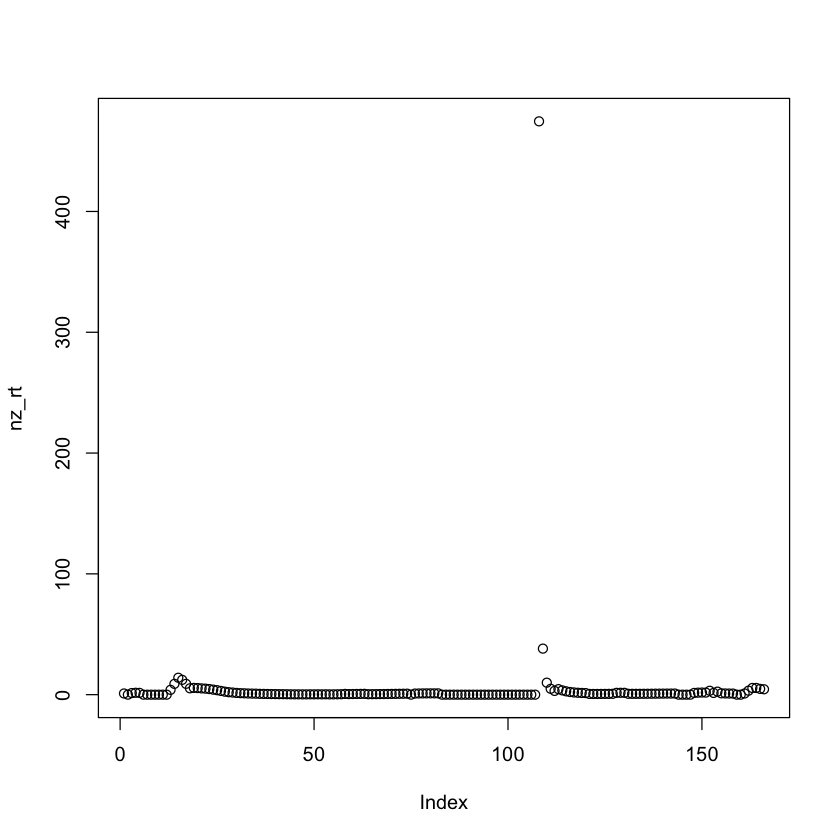

In [389]:
plot(nz_rt)

In [81]:
nz_filter <- run_pfilter(rprocess_config = tran_lognormal, dmeasure_config = meas_pois_lnorm, data = nz,
                        Np = 800, sdlog=0.3, shape = 2.3669, scale = 2.7463, x_init= 1)

NOTE: The provided objects ‘T’,‘Y’ are available for use by POMP basic components.



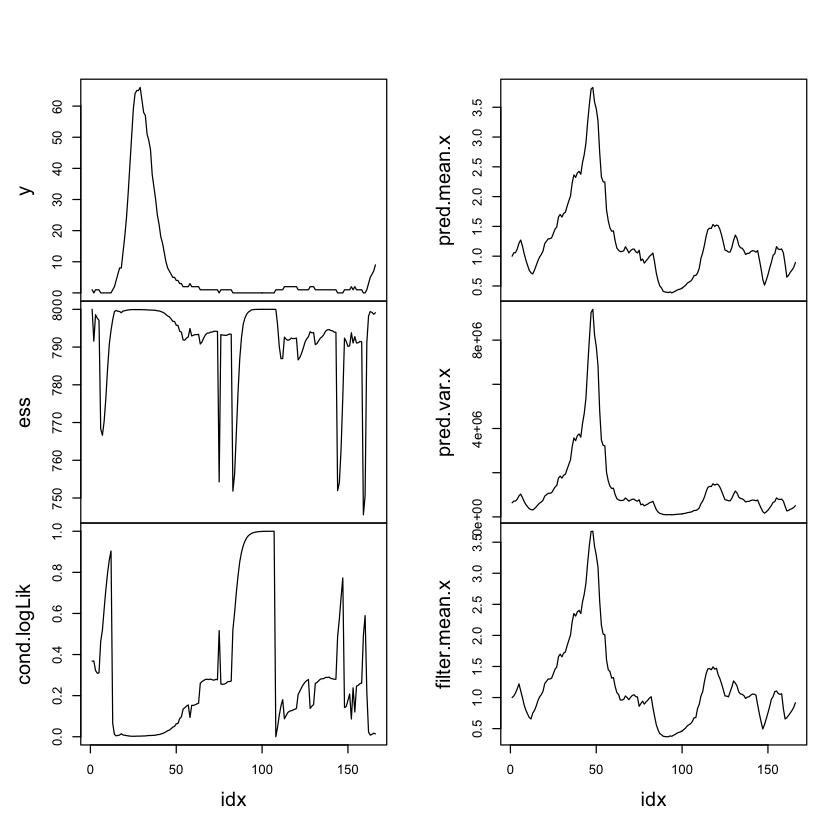

In [82]:
plot(nz_filter)

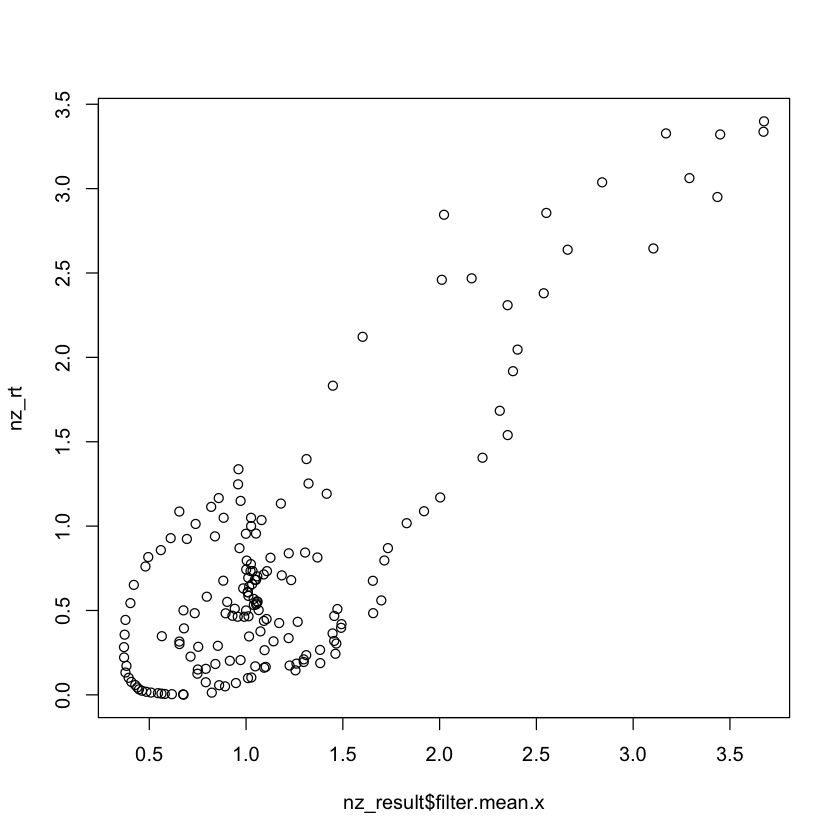

In [86]:
nz_result <- as.data.frame(nz_filter)
plot(nz_result$filter.mean.x, nz_rt)

# Canada Example

In [306]:
ca <- get_who("Canada", smooth=TRUE)

In [307]:
ca <- ca[30:nrow(ca),]
ca$idx <- 1:nrow(ca)

In [308]:
ca_rt<- get_rt(ca$y, shape = 2.3669, scale= 2.7463)

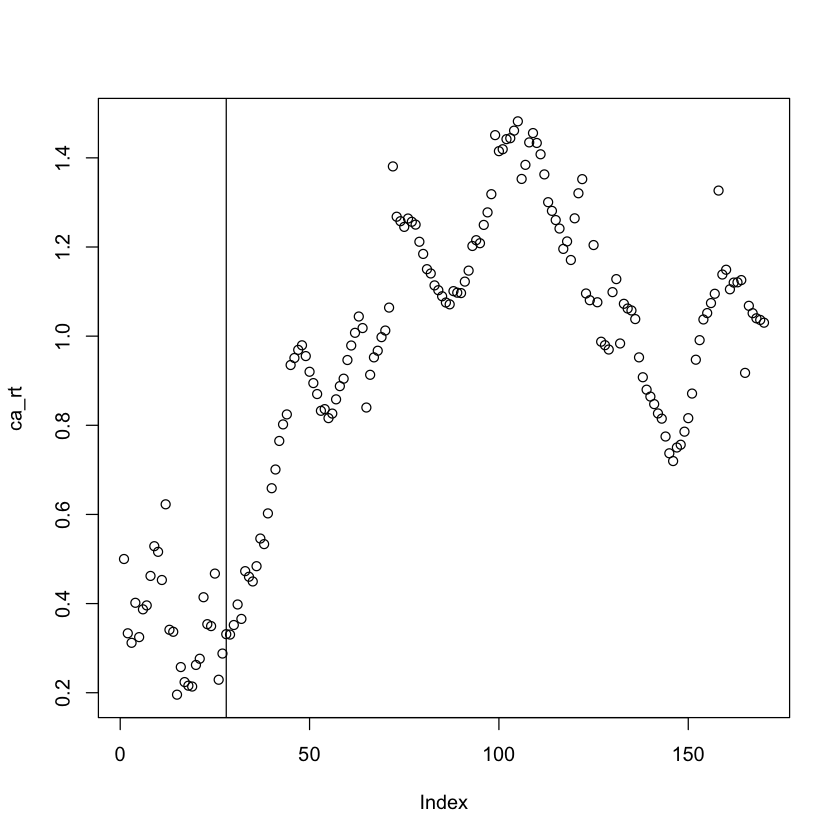

In [309]:
plot(ca_rt)
abline(v=28)

In [385]:
ca_filter <- run_pfilter(rprocess_config = tran_lognormal, dmeasure_config = meas_pois_lnorm, data = ca,
                        Np = 400, sdlog=0.12, shape = 3, scale = 2, x_init= 0.5)

NOTE: The provided objects ‘T’,‘Y’ are available for use by POMP basic components.



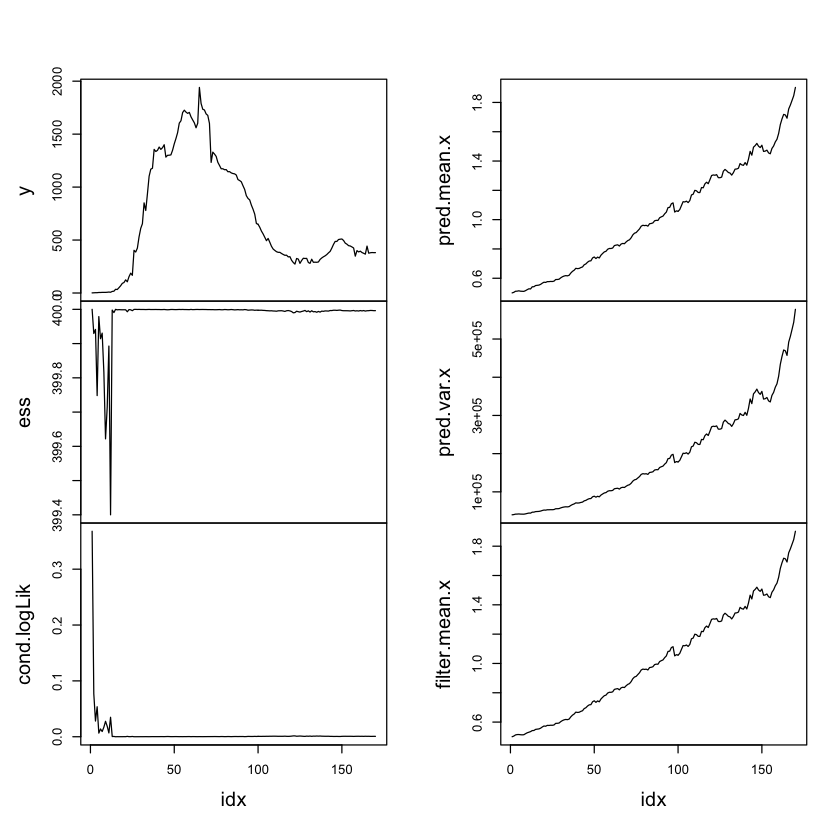

In [386]:
plot(ca_filter)

In [326]:
ca_result <- as.data.frame(ca_filter)

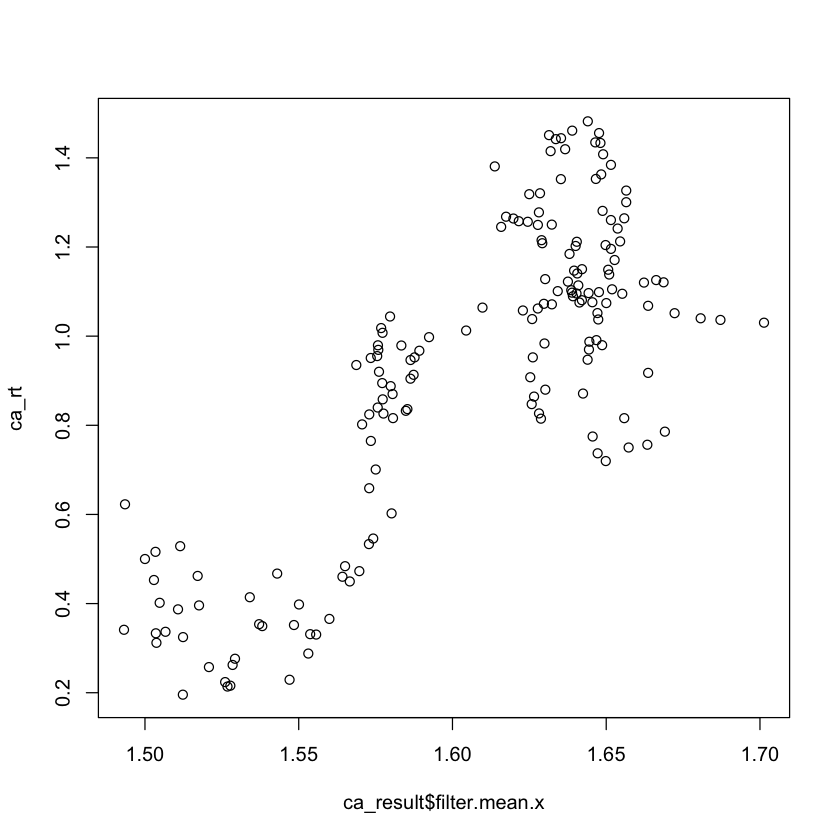

In [327]:
plot(ca_result$filter.mean.x, ca_rt)

In [336]:
ca_epifilter <- run_pfilter(rprocess_config = tran_normal_epifilter, dmeasure_config = meas_pois, data = ca,
                        Np = 400, shape = 2, scale = 2, x_init= 1)

NOTE: The provided objects ‘T’,‘Y’ are available for use by POMP basic components.



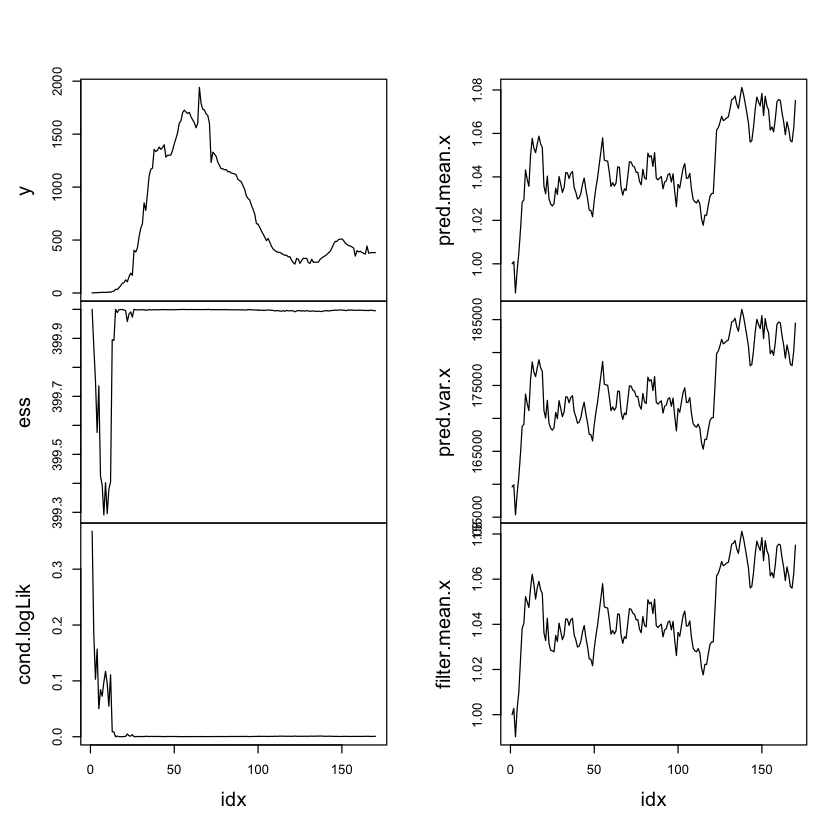

In [337]:
plot(ca_epifilter)

In [334]:
ca_epi_result <- as.data.frame(ca_epifilter)

In [338]:
var_plot <- function(shape, scale){
    return(shape*scale^2)
}

In [346]:
var_plot(2.5,2)

[1] 10

In [339]:
x <- y<- seq(0, 5, 0.2)

In [340]:
z <- outer(x, y, var_plot)

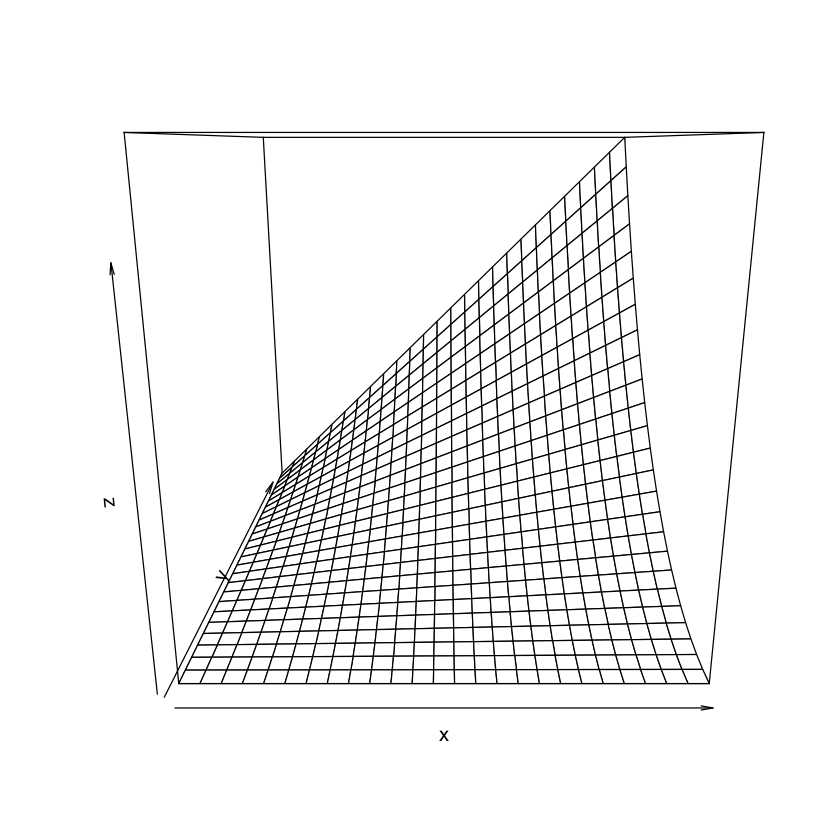

In [341]:
persp(x,y,z)